<a href="https://colab.research.google.com/github/humzkhan/CSC420A1/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1
### CSC420 - Winter 2025

**Humzah Khan**



In [63]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import requests
from google.colab.patches import cv2_imshow

Grab image

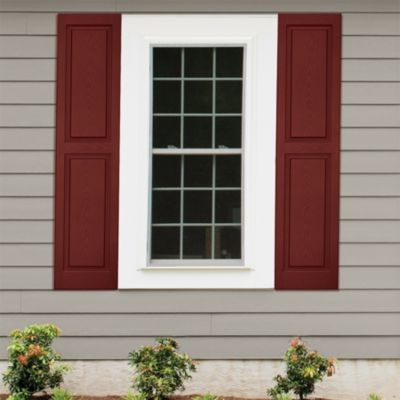

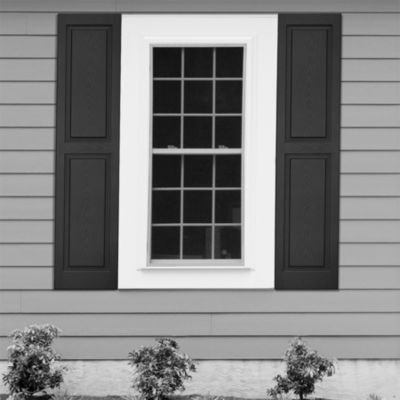

In [64]:
img_window = cv2.imread('window.jpeg')
cv2_imshow(img_window)

gray_window = cv2.cvtColor(img_window, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_window)

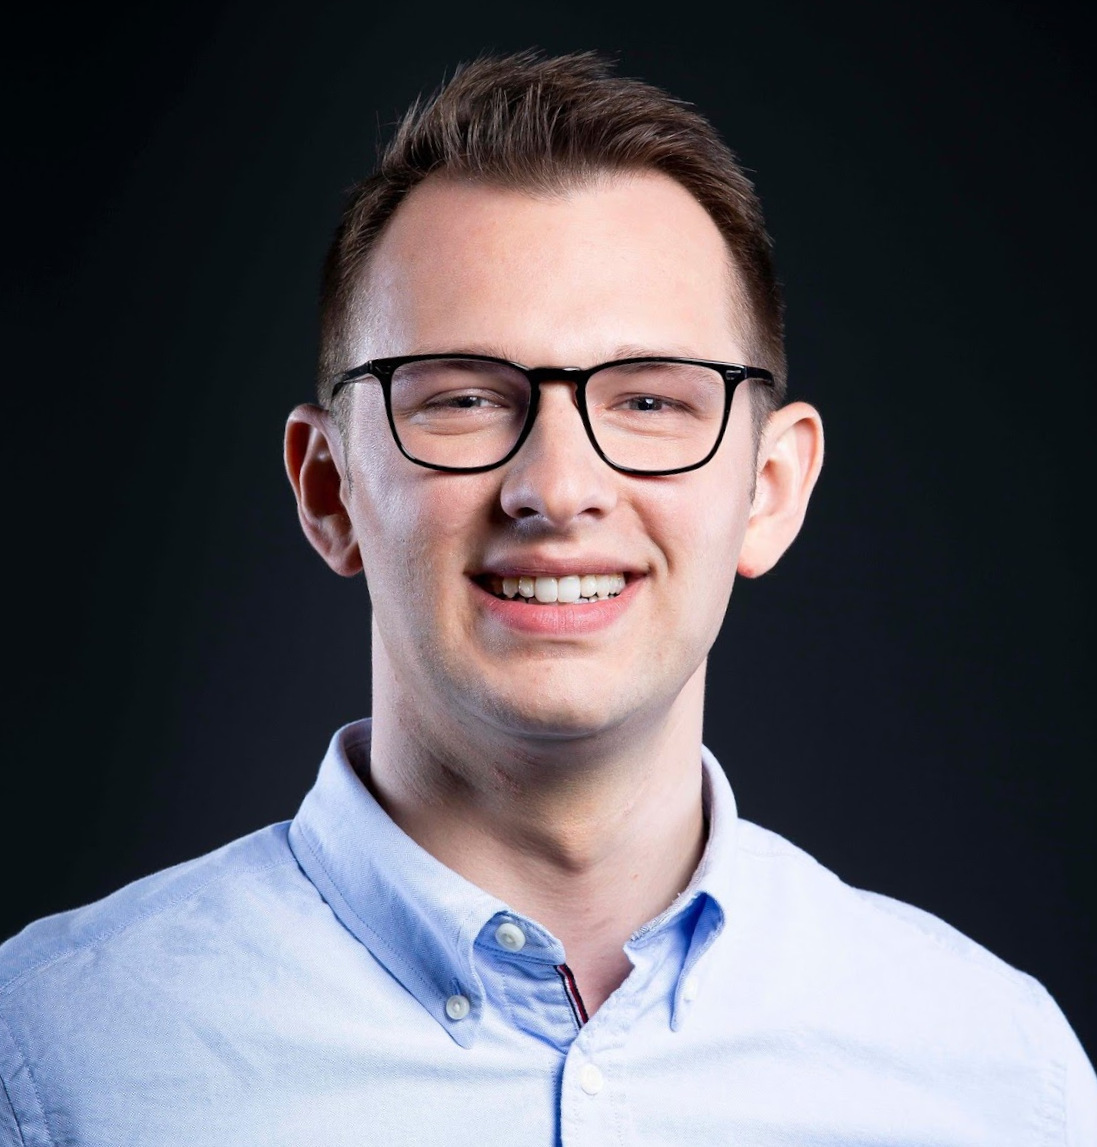

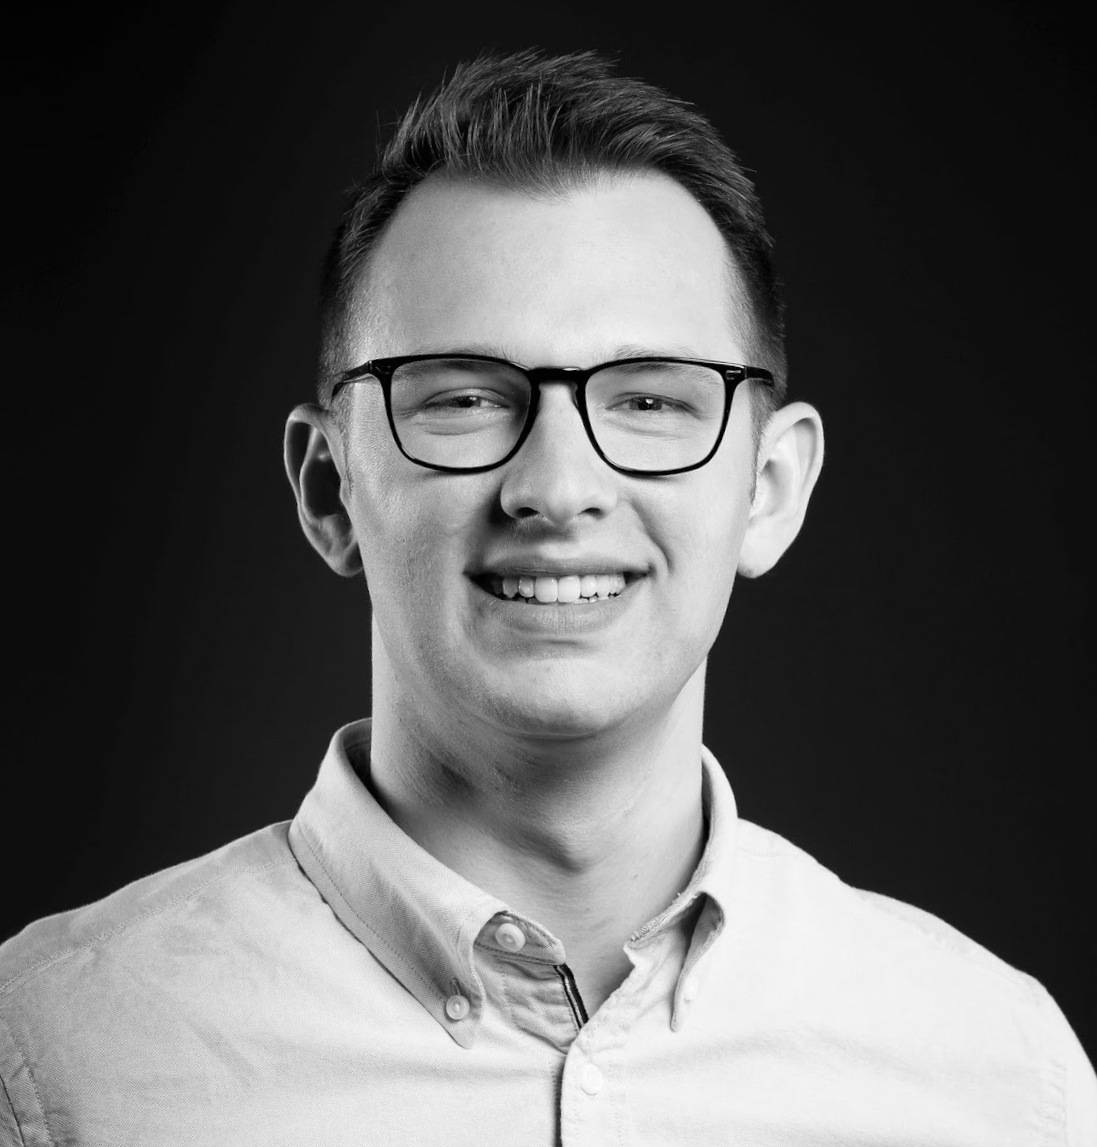

In [65]:
img = cv2.imread('prof_pic.jpeg')
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

(None, [], [])

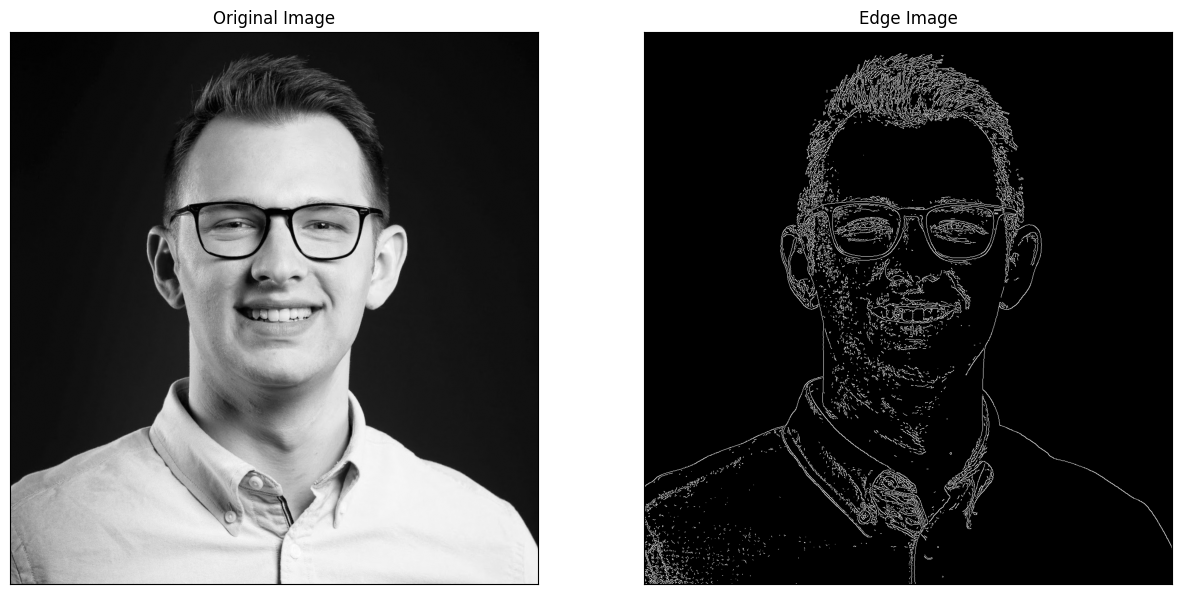

In [66]:
edges = cv2.Canny(gray, threshold1=75, threshold2=100)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray, cmap = 'gray')
ax1.title.set_text('Original Image'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(edges,cmap = 'gray')
ax2.title.set_text('Edge Image'), ax2.set_xticks([]), ax2.set_yticks([])

### Canny Edge Detector

Testing Gaussian Noise lvls

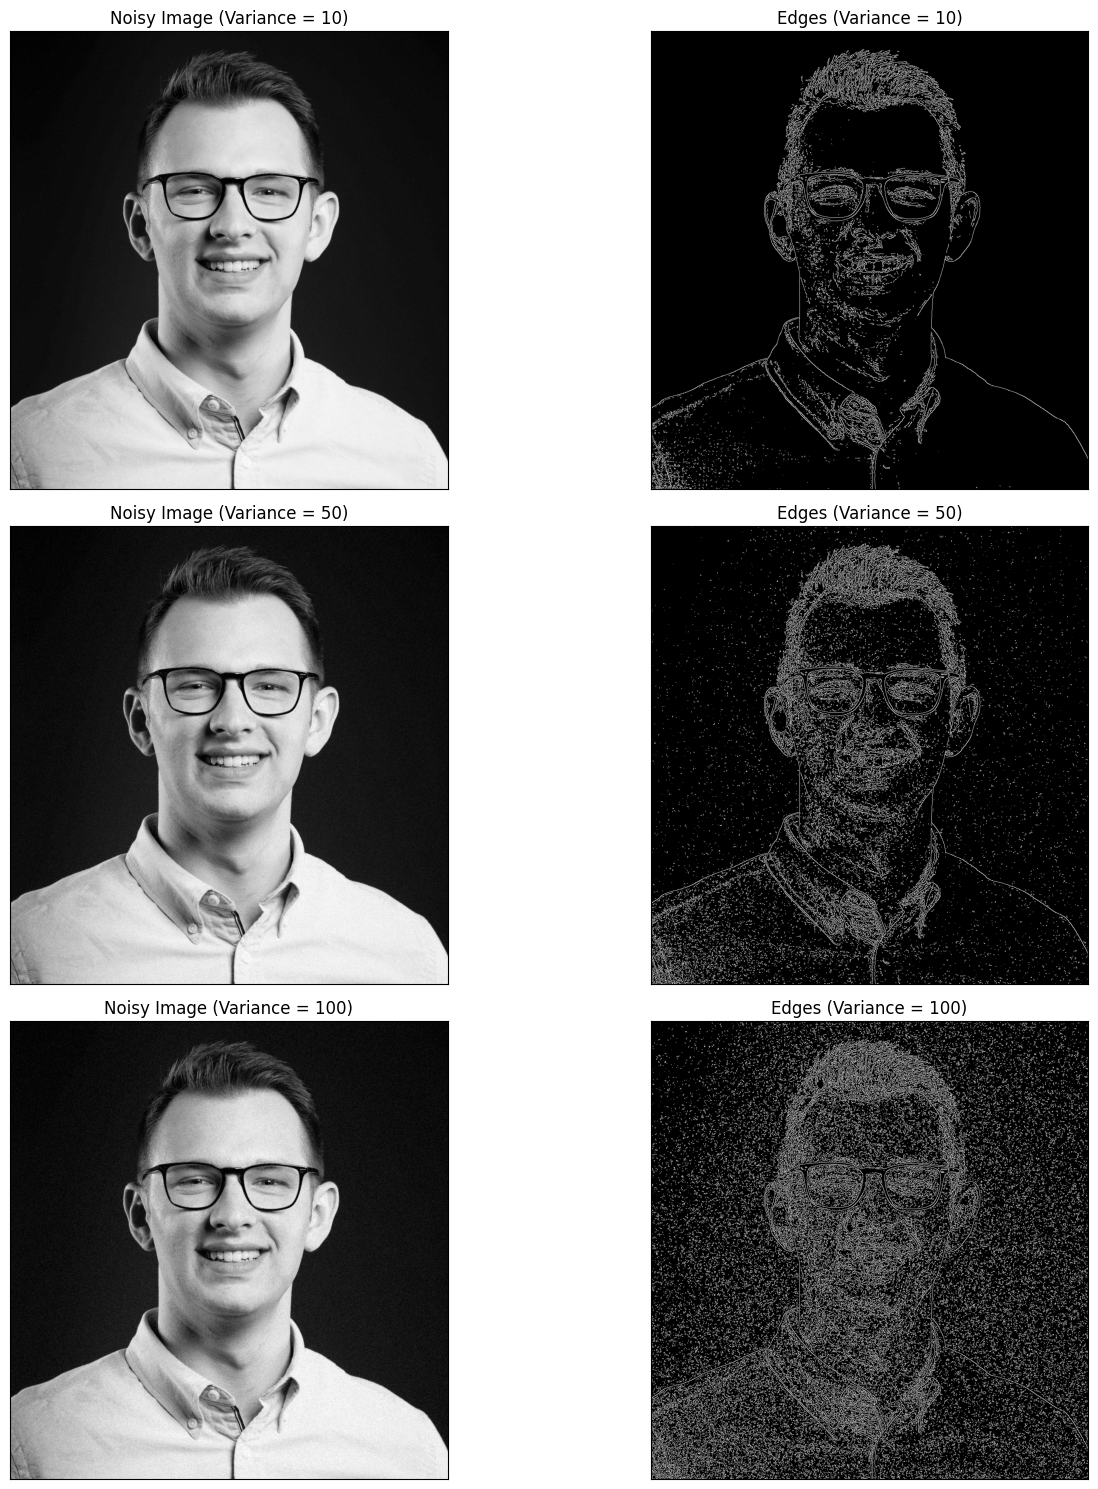

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, variance=25):
    stddev = np.sqrt(variance)  # Standard deviation
    noise = np.random.normal(mean, stddev, image.shape).astype(np.float32)
    noisy_image = image + noise
    # Clip pixel values to be within the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Define noise variances
noise_variances = [10, 50, 100]  # Low, medium, high

# Store results
results = []

for var in noise_variances:
    # Add Gaussian noise
    noisy_image = add_gaussian_noise(gray, variance=var)

    # Apply Canny edge detector
    edges = cv2.Canny(noisy_image, threshold1=75, threshold2=100)

    # Store noisy image and edges
    results.append((noisy_image, edges))

# Plot original and noisy images with their edges
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (noisy_image, edges) in enumerate(results):
    axes[i, 0].imshow(noisy_image, cmap='gray')
    axes[i, 0].title.set_text(f'Noisy Image (Variance = {noise_variances[i]})')
    axes[i, 0].set_xticks([]), axes[i, 0].set_yticks([])

    axes[i, 1].imshow(edges, cmap='gray')
    axes[i, 1].title.set_text(f'Edges (Variance = {noise_variances[i]})')
    axes[i, 1].set_xticks([]), axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()


The **Canny edge detector** is a multi-stage algorithm for detecting edges in an image by identifying areas of rapid intensity change. It first applies Gaussian smoothing to reduce noise, computes image gradients to find potential edges, applies non-maximum suppression to thin the edges, and uses double thresholding to identify and link strong and weak edges. **Gaussian noise**, in contrast, refers to random variations in pixel intensities modeled by a normal distribution, where the mean represents the average noise level (typically zero), and the **variance** measures the spread or intensity of the noise. A higher noise variance results in greater random fluctuations in pixel values. When Gaussian noise is added to an image, the edge detector may misinterpret these noisy pixels as areas of high gradient, leading to false edges. As observed in the results, the image with **low noise variance** retains the clearest and most accurate edges, closely resembling the original image. However, as noise variance increases, more noisy pixels are falsely detected as edges, creating a "sprinkled" effect of false positives, which aligns with our expectations about the sensitivity of the Canny detector to noise.

### Edge Detection

Gaussian Blurring

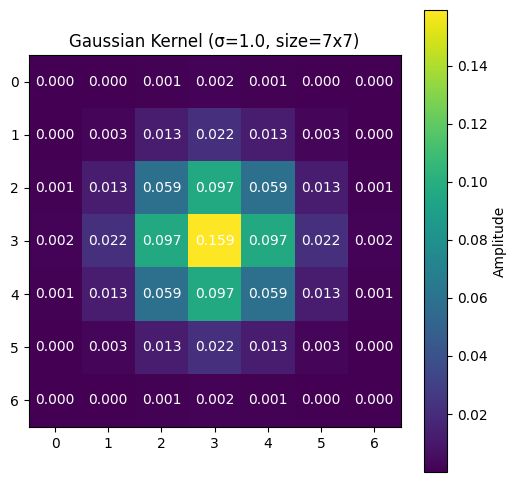

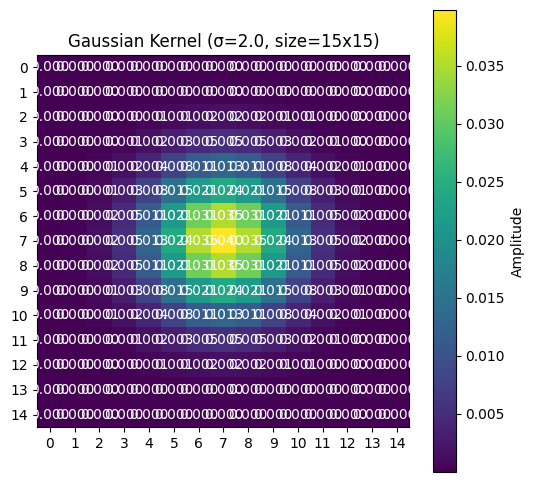

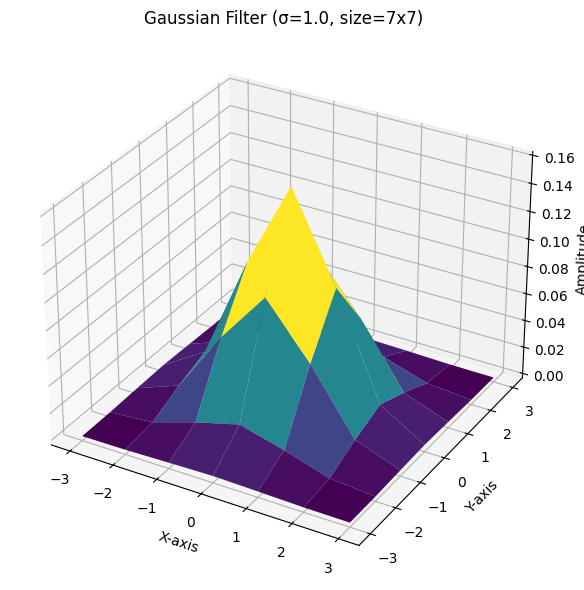

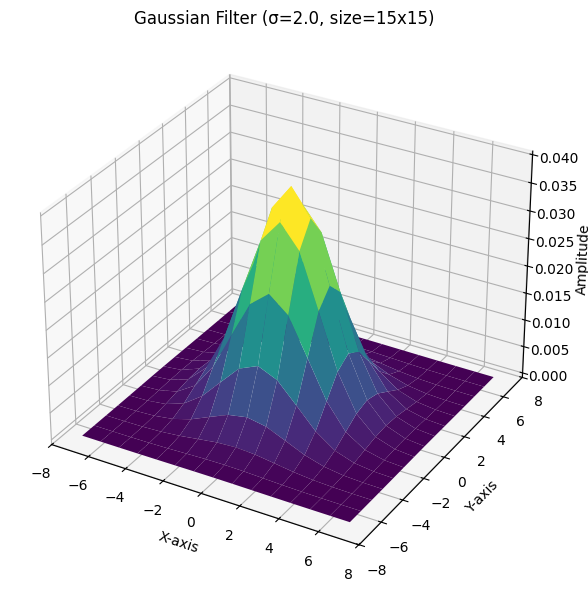

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a 2D Gaussian matrix
def generate_gaussian(size, sigma):
    """
    Generate a 2D Gaussian filter.

    Parameters:
        size (int): Size of the filter (size x size).
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        np.ndarray: 2D Gaussian filter.
    """
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Compute the Gaussian function
    gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the filter
    gaussian /= gaussian.sum()
    return gaussian

# Function to visualize a 2D Gaussian kernel as a grid with annotations
def plot_gaussian_grid(gaussian, sigma, size):
    """
    Plot the 2D Gaussian kernel as a colored grid with annotated values.

    Parameters:
        gaussian (np.ndarray): 2D Gaussian matrix.
        sigma (float): Standard deviation of the Gaussian.
        size (int): Size of the Gaussian kernel.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(gaussian, cmap='viridis')
    plt.title(f'Gaussian Kernel (σ={sigma}, size={size}x{size})')
    plt.xticks(range(size))
    plt.yticks(range(size))
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{gaussian[i, j]:.3f}", ha='center', va='center', color='white')
    plt.colorbar(label='Amplitude')
    plt.show()

# Function to visualize a 2D Gaussian kernel as a 3D surface
def plot_gaussian_3d(gaussian, sigma, size):
    """
    Visualize the 2D Gaussian kernel as a 3D surface plot.

    Parameters:
        gaussian (np.ndarray): 2D Gaussian matrix.
        sigma (float): Standard deviation of the Gaussian.
        size (int): Size of the Gaussian kernel.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(size) - size // 2
    y = np.arange(size) - size // 2
    x, y = np.meshgrid(x, y)
    ax.plot_surface(x, y, gaussian, cmap='viridis', edgecolor='none')
    ax.set_title(f'Gaussian Filter (σ={sigma}, size={size}x{size})')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Example Usage
sigma1, size1 = 1.0, 7
sigma2, size2 = 2.0, 15

# Generate Gaussian filters
gaussian1 = generate_gaussian(size1, sigma1)
gaussian2 = generate_gaussian(size2, sigma2)

# Visualize Gaussian grids
plot_gaussian_grid(gaussian1, sigma1, size1)
plot_gaussian_grid(gaussian2, sigma2, size2)

# Visualize Gaussian 3D surfaces
plot_gaussian_3d(gaussian1, sigma1, size1)
plot_gaussian_3d(gaussian2, sigma2, size2)


Gradient Magnitude

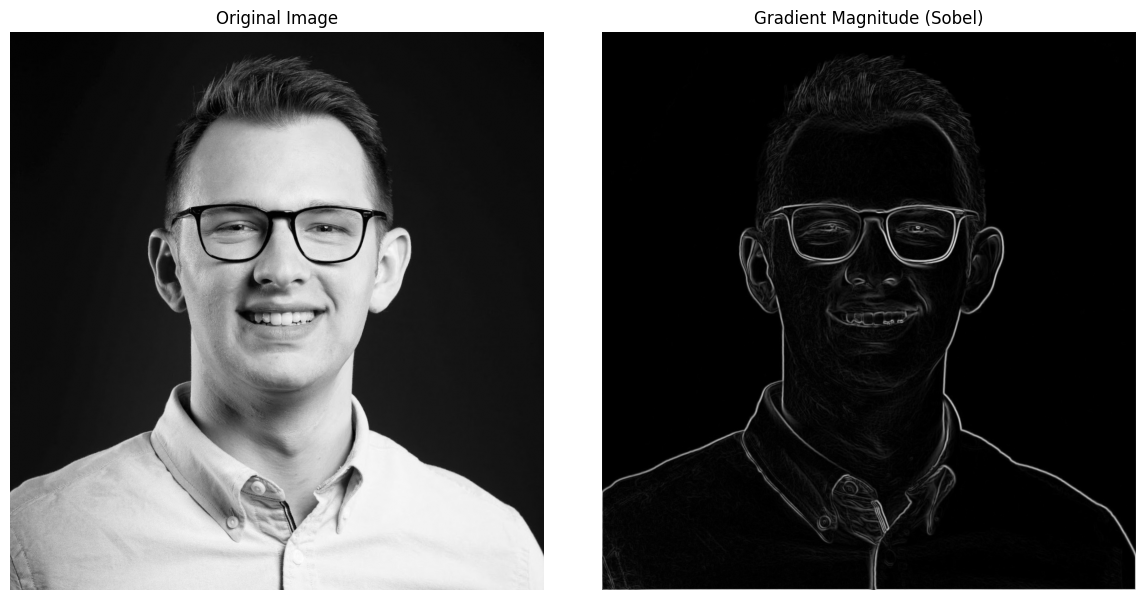

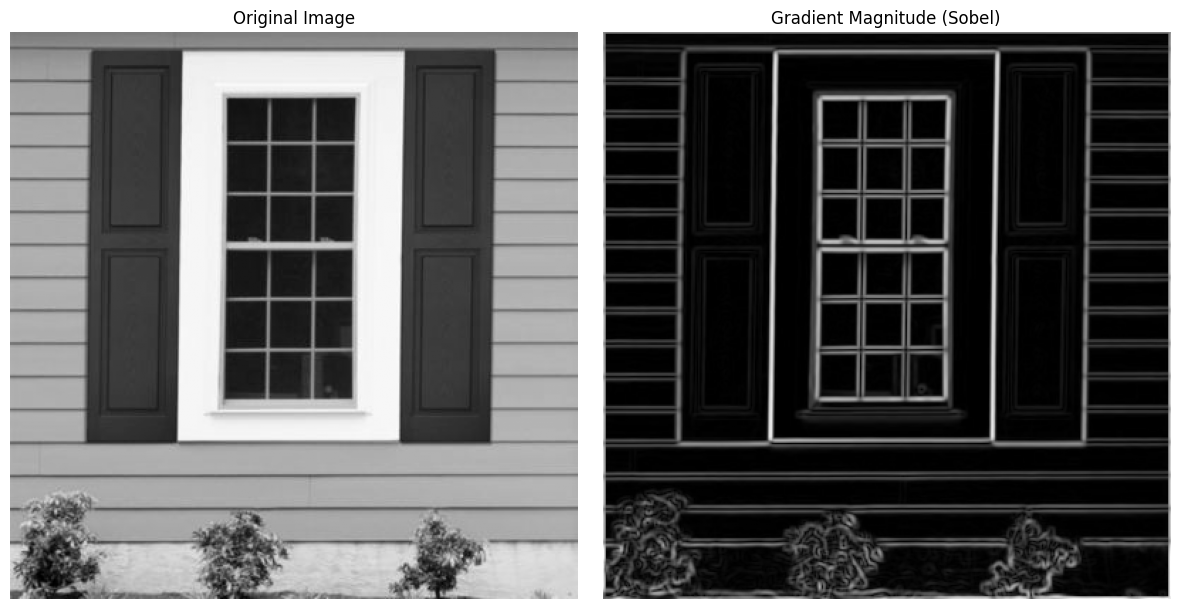

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    """
    Perform a 2D convolution operation with padding.

    Parameters:
        image (np.ndarray): Input image.
        kernel (np.ndarray): Convolution kernel (must be odd-sized).

    Returns:
        np.ndarray: Convolved image.
    """
    # Ensure kernel has odd dimensions
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel for convolution
    output = np.zeros_like(image, dtype=float)  # Initialize the output image

    # Padding dimensions
    pad_h = kernel.shape[0] // 2
    pad_w = kernel.shape[1] // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)

    return output


# Sobel operator kernels (normalized)
sobel_x = np.array([
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [4, 2, 0, -2, -4],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2]
], dtype=float)
sobel_y = np.array([
    [2, 2, 4, 2, 2],
    [1, 1, 2, 1, 1],
    [0, 0, 0, 0, 0],
    [-1, -1, -2, -1, -1],
    [-2, -2, -4, -2, -2]
], dtype=float)

# Normalize kernels
sobel_x /= np.sum(np.abs(sobel_x))
sobel_y /= np.sum(np.abs(sobel_y))

# Sobel gradient magnitude computation
def sobel_gradient(image):
    #blurred_image = cv2.GaussianBlur(image, (5, 5), 1)  # Pre-blur image
    gx = convolve2d(image, sobel_x)
    gy = convolve2d(image, sobel_y)
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    return gradient_magnitude.astype(np.uint8)


# Compute gradient magnitude
gradient_magnitude = sobel_gradient(gray)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compute gradient magnitude
gradient_magnitude2 = sobel_gradient(gray_window)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_window, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude2, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()


Threshold Algorithm

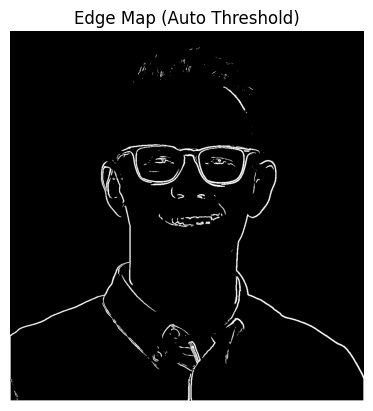

In [72]:
import numpy as np

def compute_threshold(gradient_image, epsilon=0.01):
    """
    Automatically determine a threshold value for edge detection using an iterative approach.

    Parameters:
        gradient_image (np.ndarray): The gradient magnitude image (2D array).
        epsilon (float): Convergence criterion for stopping the iteration.

    Returns:
        np.ndarray: Binary edge map (edges are white, non-edges are black).
    """
    # Initialize tau to the average intensity of the gradient image
    tau = np.mean(gradient_image)
    difference = float('inf')  # Set an initial high difference value
    i = 0

    while difference > epsilon:
        # Classify pixels into two groups based on the current tau value
        group_high = gradient_image[gradient_image > tau]
        group_low = gradient_image[gradient_image <= tau]

        # Compute the average gradient magnitudes of each class
        mH = np.mean(group_high) if group_high.size > 0 else 0
        mL = np.mean(group_low) if group_low.size > 0 else 0

        # Update tau to the average of mH and mL
        new_tau = (mH + mL) / 2

        # Compute the difference between current tau and new tau
        difference = abs(new_tau - tau)
        tau = new_tau  # Update tau
        i += 1

    # Create a binary edge map
    edge_map = np.zeros_like(gradient_image, dtype=np.uint8)
    edge_map[gradient_image > tau] = 255  # White for edges
    edge_map[gradient_image <= tau] = 0  # Black for non-edges

    return edge_map

# Usage Example
# Assuming you have a gradient magnitude image `gradient_image`:
edge_map = compute_threshold(gradient_magnitude, epsilon=0.01)

# Visualize the results
# import matplotlib.pyplot as plt
plt.imshow(edge_map, cmap='gray')
plt.title('Edge Map (Auto Threshold)')
plt.axis('off')
plt.show()


Test Windows Image

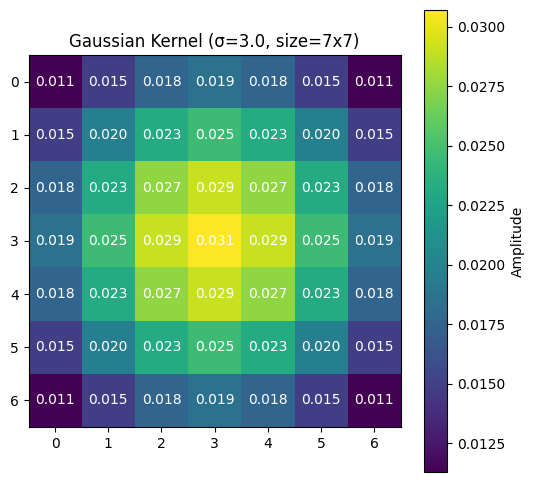

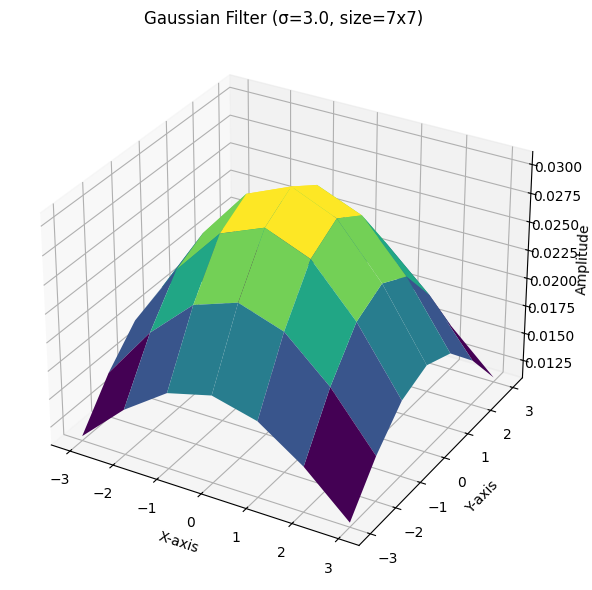

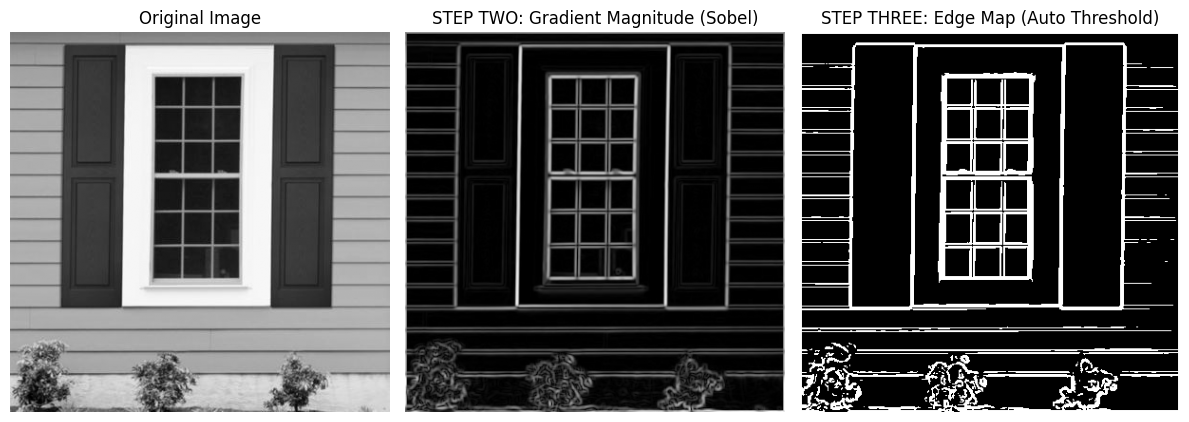

In [85]:
### STEP ONE ###
# Gaussian Kernel
sigma1, size1 = 3.0, 7

# Generate Gaussian filters
gaussian1 = generate_gaussian(size1, sigma1)

# Visualize Gaussian grids
plot_gaussian_grid(gaussian1, sigma1, size1)

# Visualize Gaussian 3D surfaces
plot_gaussian_3d(gaussian1, sigma1, size1)



### STEP TWO ###
# Compute gradient magnitude
gradient_magnitude_window = sobel_gradient(gray_window)



### STEP THREE ###
# Compute threshold algorithm
edge_map = compute_threshold(gradient_magnitude_window, epsilon=0.01)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_window, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude_window, cmap='gray')
plt.title('STEP TWO: Gradient Magnitude (Sobel)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_map, cmap='gray')
plt.title('STEP THREE: Edge Map (Auto Threshold)')
plt.axis('off')

plt.tight_layout()
plt.show()
